In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/My Drive/dataset/")
!ls

Iris.csv  mnist_train.csv  prestamo1.csv  telcomunicacion.csv


In [ ]:
import pandas as pd

tel=pd.read_csv("telcomunicacion.csv")

In [ ]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Eliminar columnas irrelevantes y manejar valores nulos si es necesario
tel = tel.drop(columns=['customerID'])
tel = tel.dropna()

In [ ]:
# Convertir variables categóricas a variables dummy
tel = pd.get_dummies(tel, drop_first=True)

In [ ]:
# Separar variables independientes (X) y dependientes (y)
X = tel.drop(columns=['Churn_Yes'])
y = tel['Churn_Yes']

In [ ]:
# Estandarizar las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# 3. Dividir el dataset en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Convertir a numpy array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
# 4. Definir las funciones necesarias

def calcularSigmoide(z):
    return 1 / (1 + np.exp(-z))

def calcularCosto(theta, X, y):
    m = y.size
    h = calcularSigmoide(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    return J

def descensoGradiente(theta, X, y, alpha, num_iters):
    m = y.shape[0]
    J_history = []

    for i in range(num_iters):
        h = calcularSigmoide(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)
        J_history.append(calcularCosto(theta, X, y))

    return theta, J_history

In [ ]:
# Agregar un término de intercepción a X_train
m, n = X_train.shape
X_train = np.concatenate([np.ones((m, 1)), X_train], axis=1)

In [ ]:
# Inicializar theta y definir hiperparámetros
theta = np.zeros(X_train.shape[1])
alpha = 0.01
num_iters = 500
# Ejecutar el descenso por el gradiente
theta, J_history = descensoGradiente(theta, X_train, y_train, alpha, num_iters)

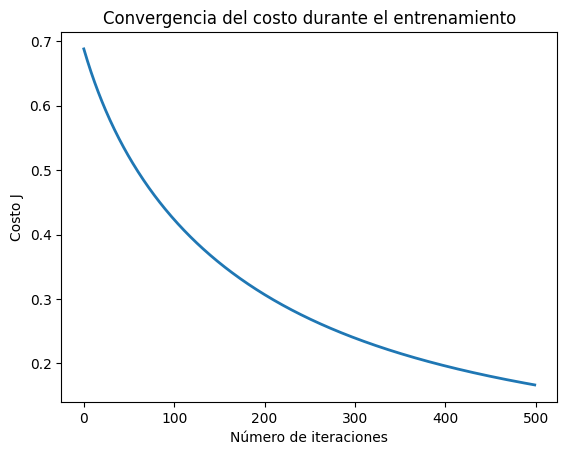

In [ ]:
# 5. Graficar la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Costo J')
plt.title('Convergencia del costo durante el entrenamiento')
plt.show()

In [ ]:
# 6. Evaluar el modelo en el conjunto de prueba
X_test = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)
y_pred_prob = calcularSigmoide(X_test.dot(theta.T))
y_pred = (y_pred_prob >= 0.5).astype(int)

In [ ]:
# Reporte de rendimiento
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.6933995741660752
Confusion Matrix:
 [[661 375]
 [ 57 316]]
Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.64      0.75      1036
        True       0.46      0.85      0.59       373

    accuracy                           0.69      1409
   macro avg       0.69      0.74      0.67      1409
weighted avg       0.80      0.69      0.71      1409



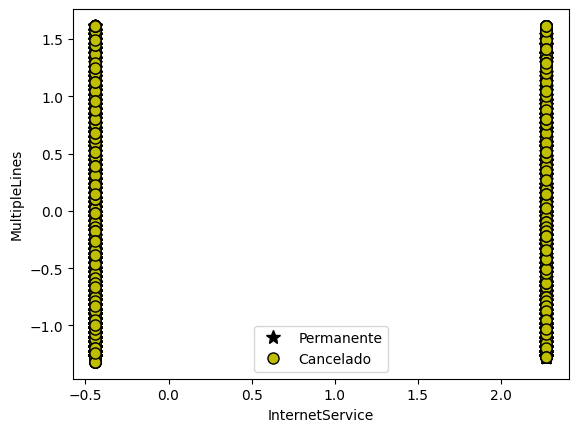

In [ ]:
# 7. (Opcional) Visualizar los datos
def plotData(X, y):
    fig = plt.figure()
    pos = y == 1
    neg = y == 0
    plt.plot(X[pos, 1], X[pos, 2], 'k*', lw=2, ms=10)
    plt.plot(X[neg, 1], X[neg, 2], 'ko', mfc='y', ms=8, mec='k', mew=1)
    plt.xlabel('InternetService')
    plt.ylabel('MultipleLines')
    plt.legend(['Permanente', 'Cancelado'])
    plt.show()

plotData(X_train, y_train)